In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_folder = "./data/gnome_stats"

chromosomes = [
    "chrI", "chrII", "chrIII", "chrIV", "chrV", "chrVI", "chrVII", "chrVIII", "chrIX", "chrX",
    "chrXI", "chrXII", "chrXIII", "chrXIV", "chrXV", "chrXVI", "chrMT"
]

Gs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,20]

In [3]:
def get_table(chr, g):
    file = f"{data_folder}/g{g}_DBVPG6765_1_{chr}.fa.gnome_stats"
    return pd.read_csv(file, sep='\t', skiprows=4)

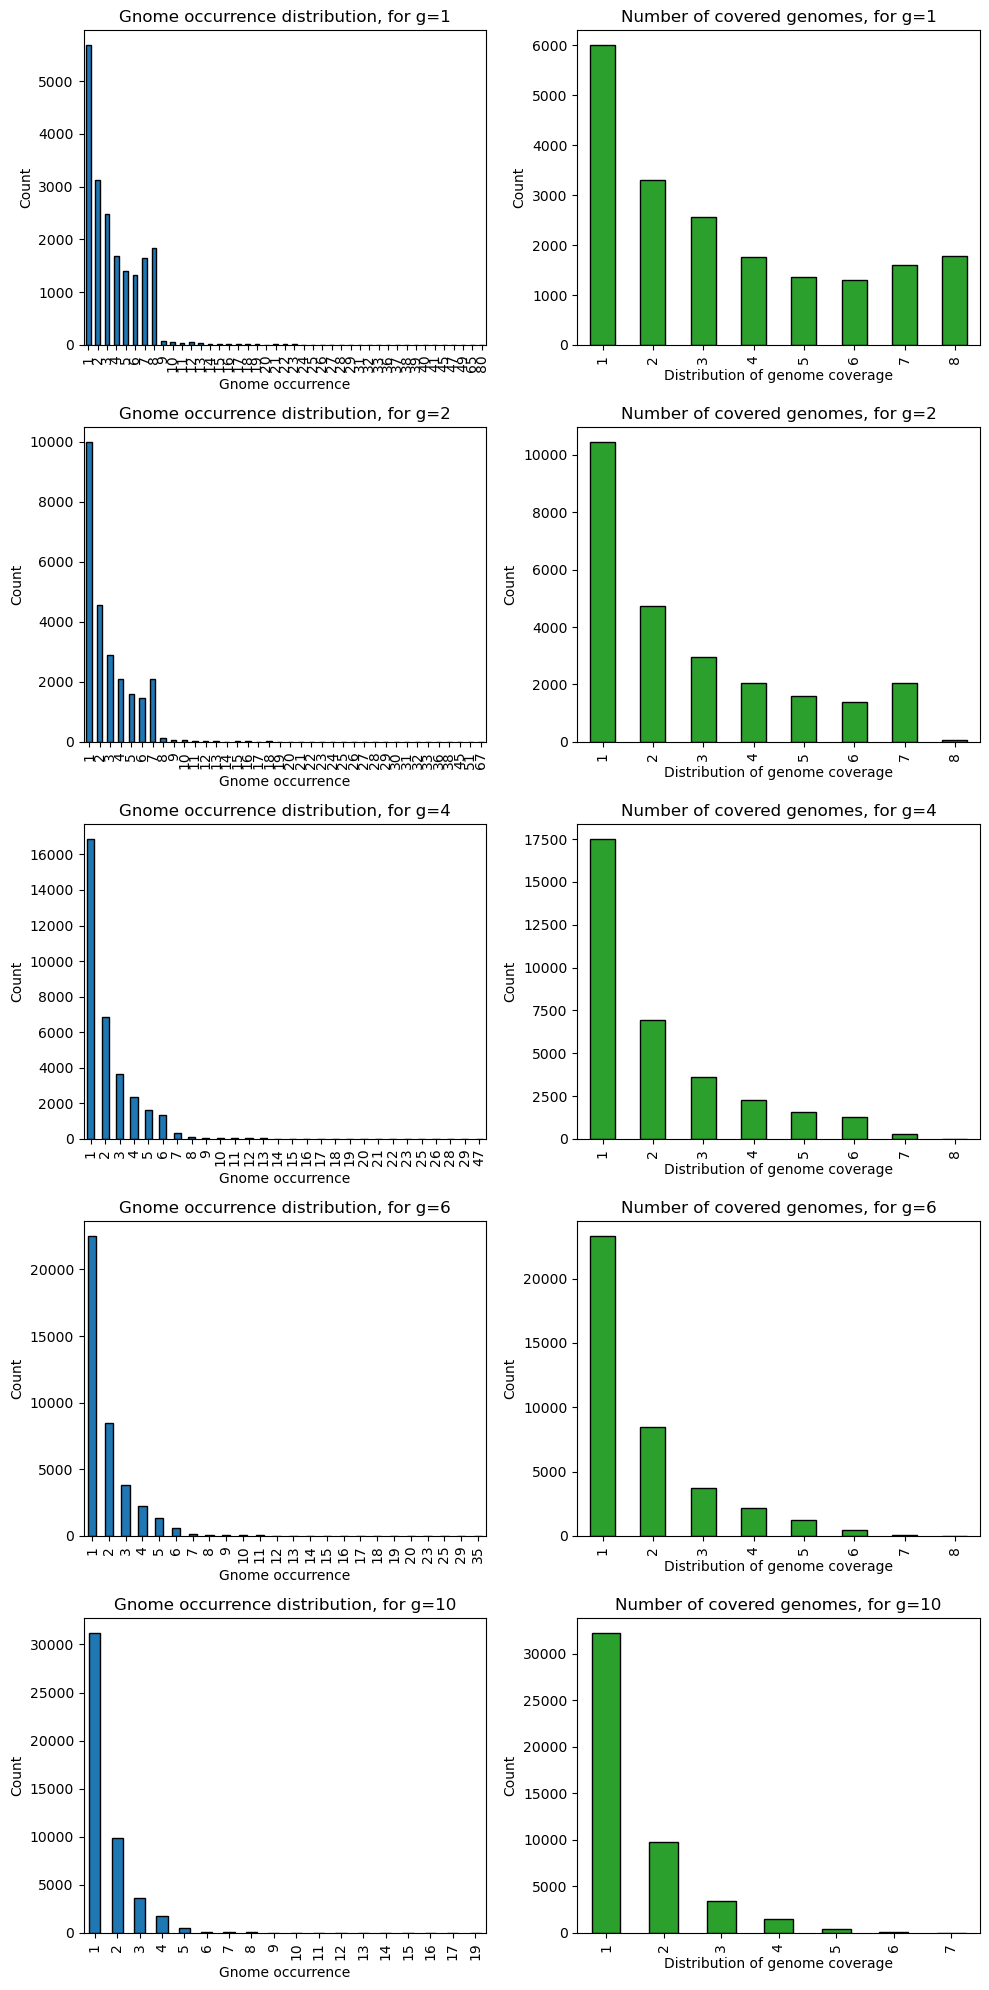

In [4]:
chr = chromosomes[0]
Gs = [1, 2, 4, 6, 10]

num_rows = len(Gs)
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

for i, g in enumerate(Gs):
    table = get_table(chr, g)
    total = table.sum(axis=1)
    genomes = (table > 0).sum(axis=1)

    # Plot total_counts
    total_counts = total.value_counts().sort_index()
    total_counts.plot(kind='bar', color='tab:blue', edgecolor='black', ax=axes[i, 0])
    axes[i, 0].set_xlabel('Gnome occurrence')
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].set_title(f'Gnome occurrence distribution, for g={g}')

    # Plot genomes_counts
    genomes_counts = genomes.value_counts().sort_index()
    genomes_counts.plot(kind='bar', color='tab:green', edgecolor='black', ax=axes[i, 1])
    axes[i, 1].set_xlabel('Distribution of genome coverage')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_title(f'Number of covered genomes, for g={g}')

plt.tight_layout()
plt.show()

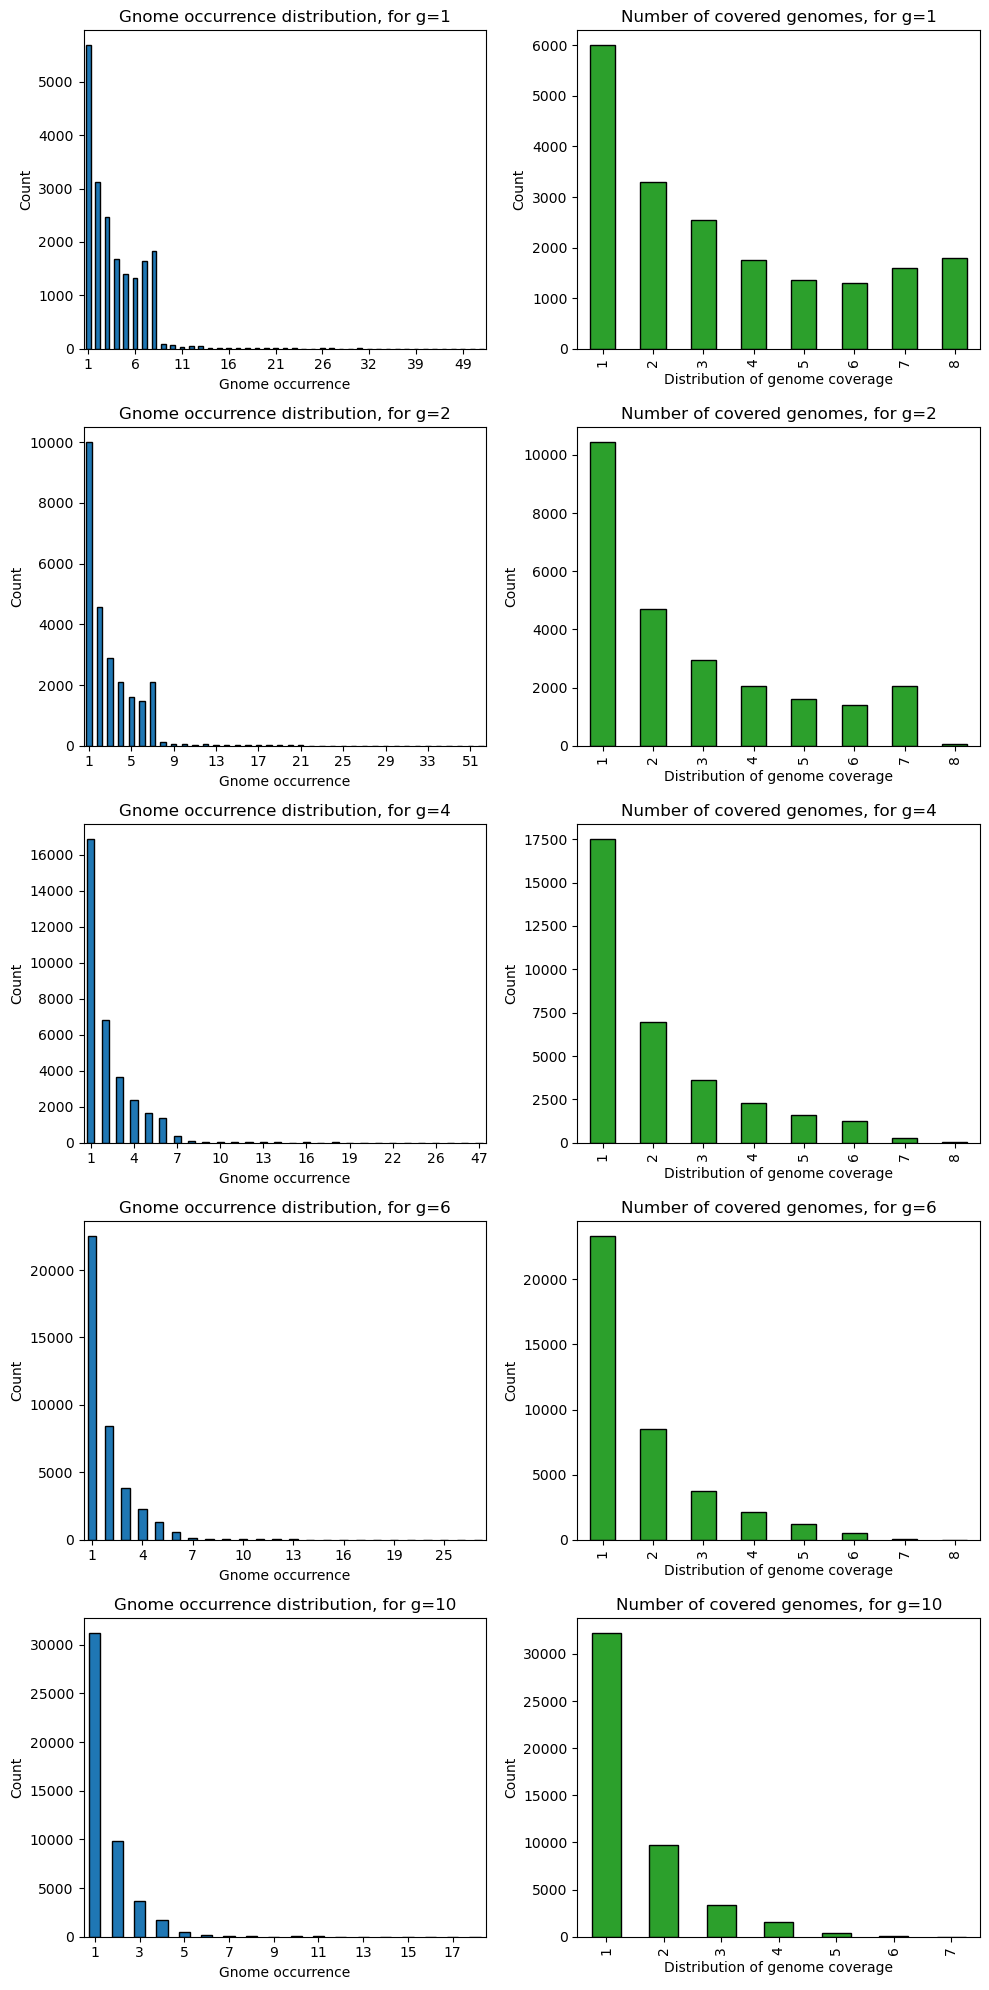

In [5]:
chr = chromosomes[0]
Gs = [1, 2, 4, 6, 10]

num_rows = len(Gs)
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

for i, g in enumerate(Gs):
    table = get_table(chr, g)
    total = table.sum(axis=1)
    genomes = (table > 0).sum(axis=1)

    # Plot total_counts
    total_counts = total.value_counts().sort_index()
    total_counts.plot(kind='bar', color='tab:blue', edgecolor='black', ax=axes[i, 0])
    axes[i, 0].set_xticks(range(len(total_counts.index)))
    axes[i, 0].set_xticklabels(total_counts.index.astype(int), rotation=0)
    axes[i, 0].set_xlabel('Gnome occurrence')
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].set_title(f'Gnome occurrence distribution, for g={g}')

    # Plot genomes_counts
    genomes_counts = genomes.value_counts().sort_index()
    genomes_counts.plot(kind='bar', color='tab:green', edgecolor='black', ax=axes[i, 1])
    axes[i, 1].set_xlabel('Distribution of genome coverage')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_title(f'Number of covered genomes, for g={g}')


    # Set x-ticks to show all values but in a cleaner way
    if len(total_counts) > 0:
        axes[i, 0].set_xticks(np.arange(len(total_counts)))
        axes[i, 0].set_xticklabels(total_counts.index, rotation=0)
        axes[i, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [6]:
chr = chromosomes[0]

unique = []
mean = []
mean_without_uniques = []
median = []
median_without_uniques = []
mean_genomes = []
mean_genomes_without_uniques = []
median_genomes = []
median_genomes_without_uniques = []

for g in Gs:
    table = get_table(chr, g)
    genomes = (table > 0).sum(axis=1)
    total = table.sum(axis=1)
    
    unique.append((total == 1).sum() / len(table))
    mean.append(total.mean())
    mean_without_uniques.append(total[total > 1].mean())
    median.append(total.median())
    median_without_uniques.append(total[total > 1].median())
    mean_genomes.append(genomes.mean())
    mean_genomes_without_uniques.append(genomes[total > 1].mean())
    median_genomes.append(genomes.median())
    median_genomes_without_uniques.append(genomes[total > 1].median())

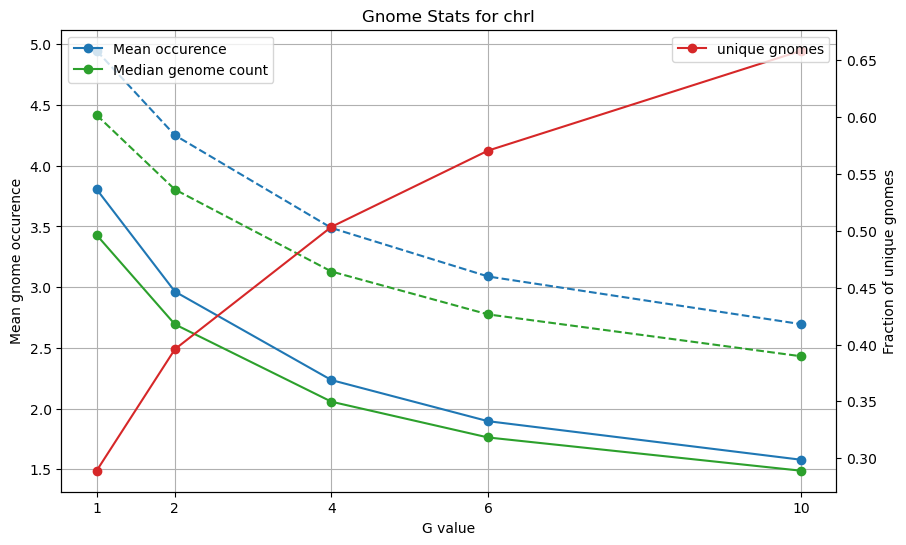

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(Gs, mean, marker='o', label='Mean occurence', color='tab:blue')
ax1.plot(Gs, mean_without_uniques, marker='o', linestyle='--', color='tab:blue')
# ax1.plot(Gs, median, marker='o', label='Median occurences', color='tab:blue')
# ax1.plot(Gs, median_without_uniques, marker='o', linestyle='--', color='tab:blue')
ax1.plot(Gs, mean_genomes, marker='o', label='Median genome count', color='tab:green')
ax1.plot(Gs, mean_genomes_without_uniques, marker='o', linestyle='--', color='tab:green')
ax1.set_xlabel('G value')
ax1.set_ylabel('Mean gnome occurence')
ax1.set_title(f'Gnome Stats for {chr}')
ax1.set_xticks(Gs)
ax1.legend(loc='upper left')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(Gs, unique, marker='o', label='unique gnomes', color='tab:red')
ax2.set_ylabel('Fraction of unique gnomes')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.show()